In [6]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error 


F:\Jupiter\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  


In [18]:
day_energy = read_csv('day_energy.csv')

As we can see, in most hours. The data has relatively same mean and stand deviation, but it is a bit seasonal. Thus, the data is not
perfectly stationary.In this case, I have to integrate the data, so ARIMA model is a good choice for time series analysis. SARIMA is for seasonal time series analysis, I will try it later.

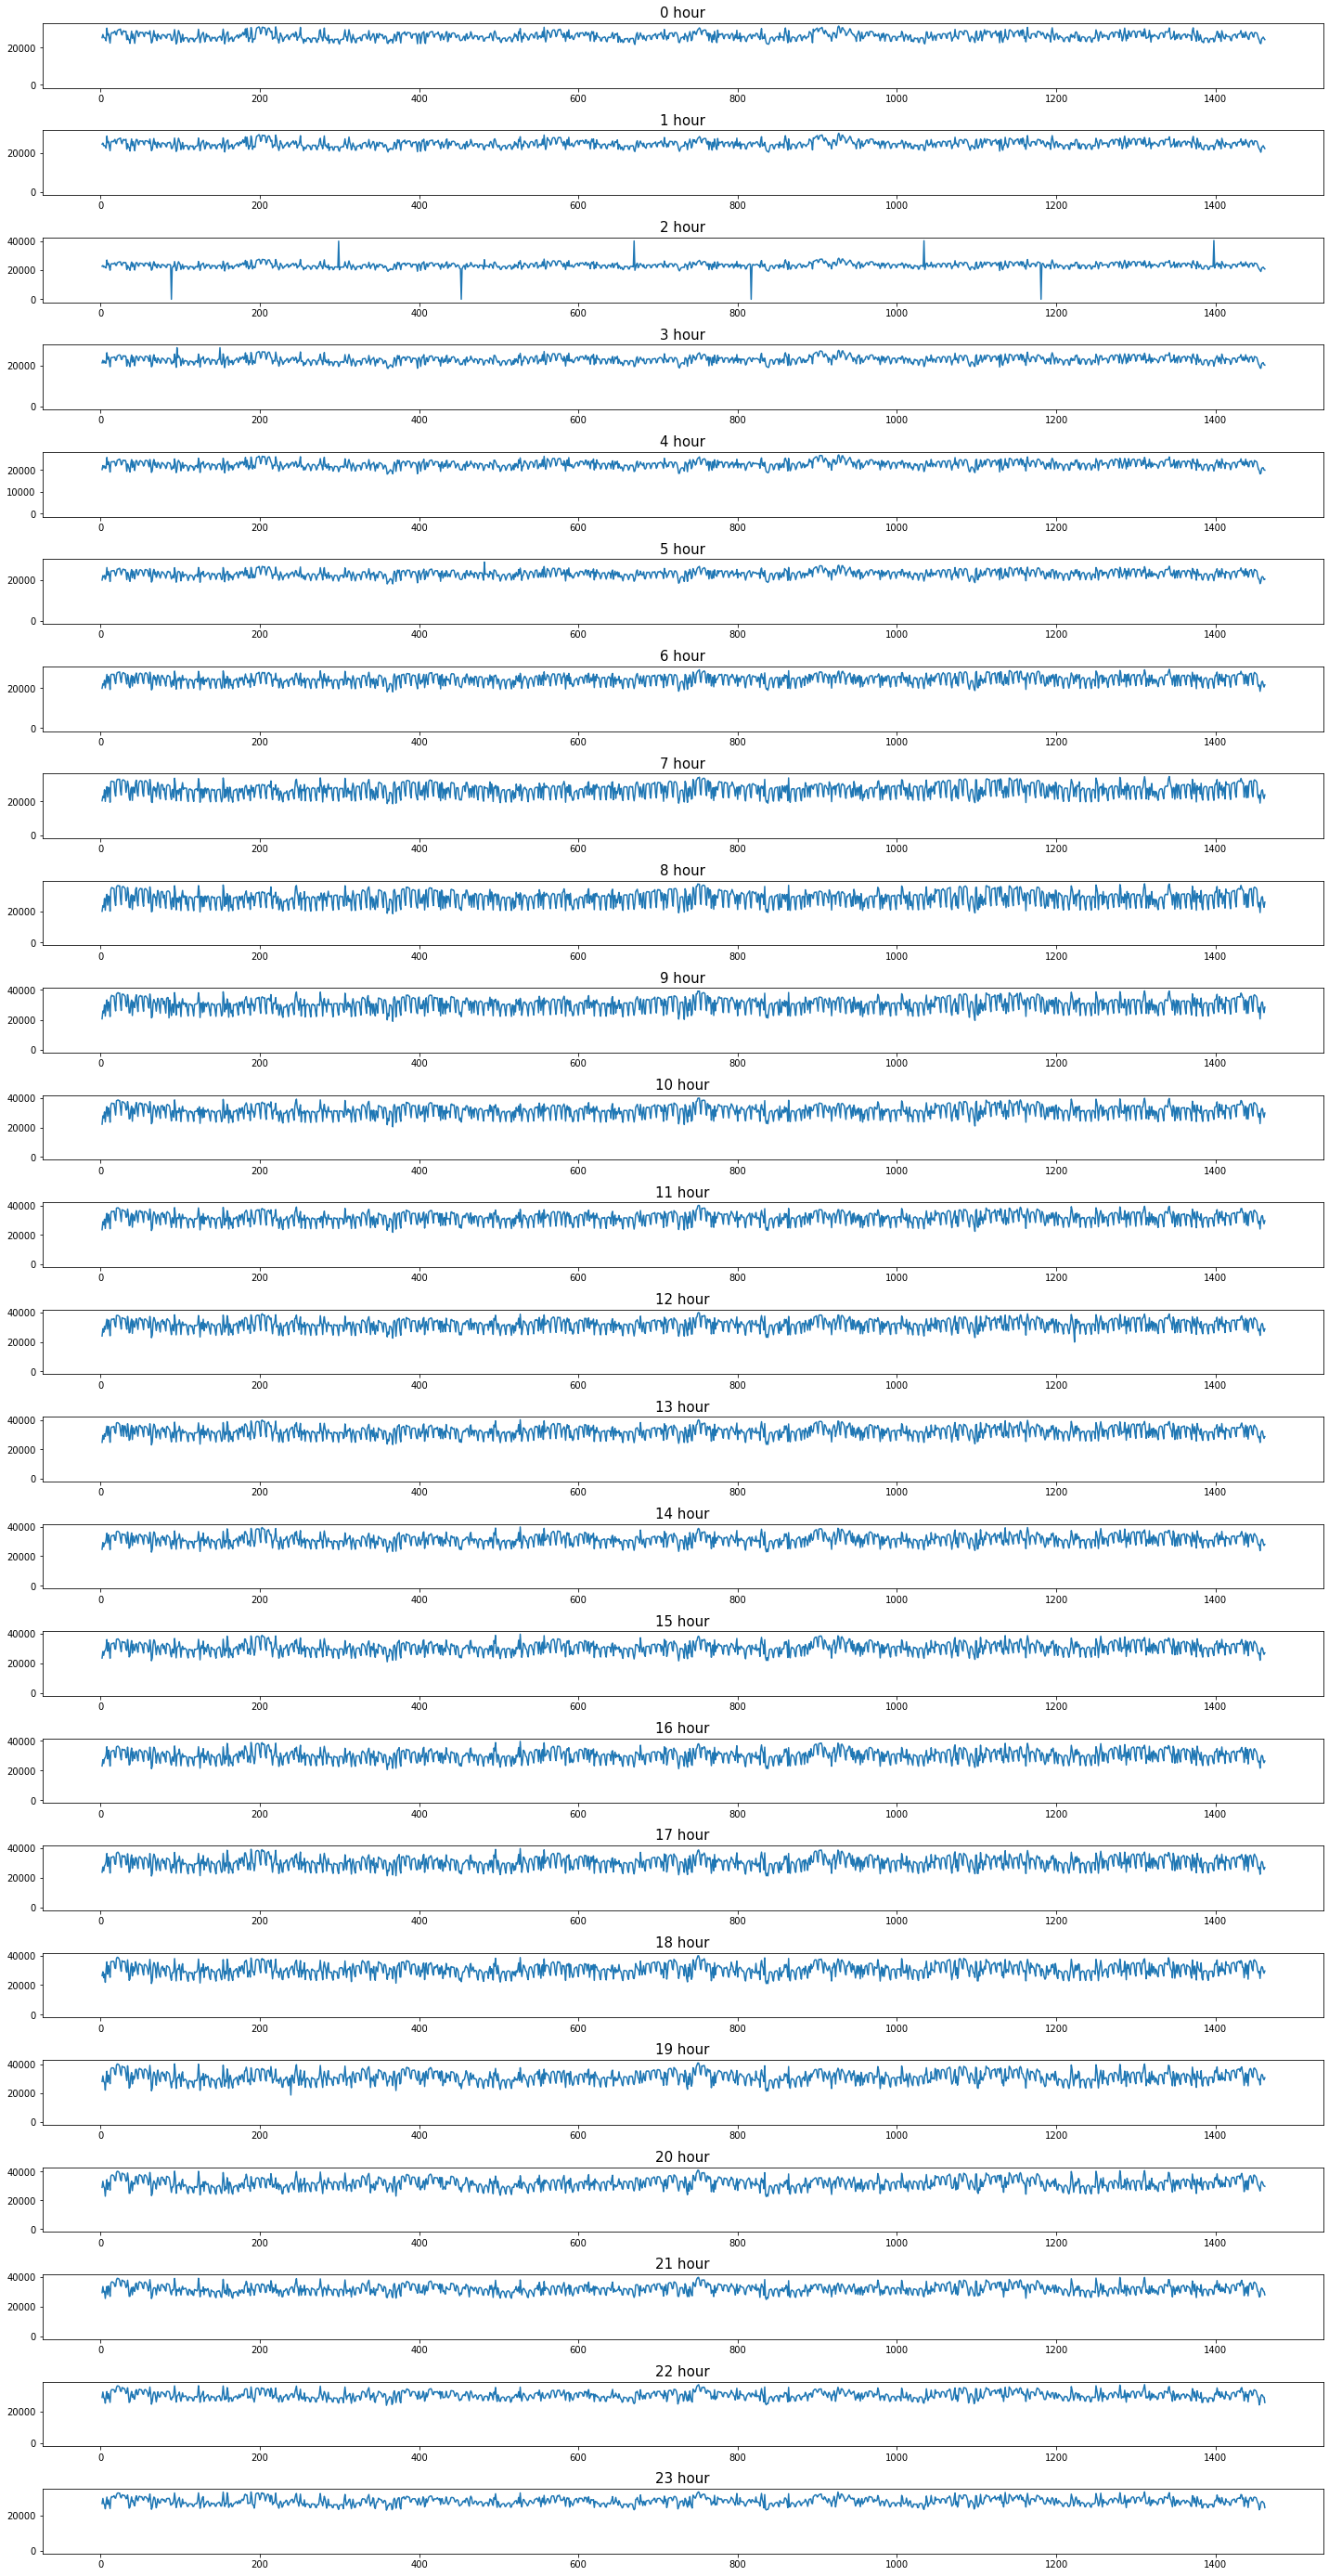

In [23]:
pyplot.figure(figsize=(20,40))
for i in range(1,25):
  p = pyplot.subplot2grid((25,1),(i,0))
  pyplot.plot(day_energy.index, day_energy.iloc[:, i])
  title = str(i-1) + ' hour'
  pyplot.title(title,fontsize=15)
  pyplot.tight_layout()
pyplot.show()

Autocorrelation plot for hour 0, we can clearly see, the order for Moving average is 10

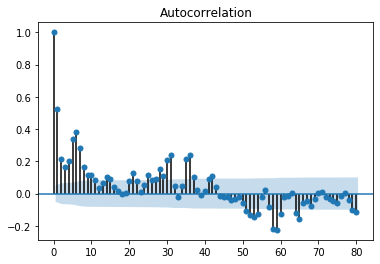

In [10]:
plot_acf(merge, lags=80)
pyplot.show()

Partial autocorrelation plot for hour 1, we can clearly see, the order of Autoregression is 6

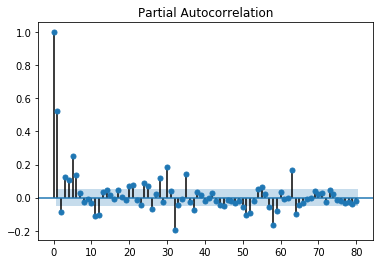

In [11]:
plot_pacf(merge,lags=80)
pyplot.show()

# Running ARIMA model
* The autoregression order set to be 6, and integration order set to 1, moving average order set to 0
* 2/3 of data on training set, 1/3 of data on test set
* MSE equals to 2168752 it is way better than linear regression, all the MSE I got from linear regression is 8 digits.

Test MSE: 2168752.460


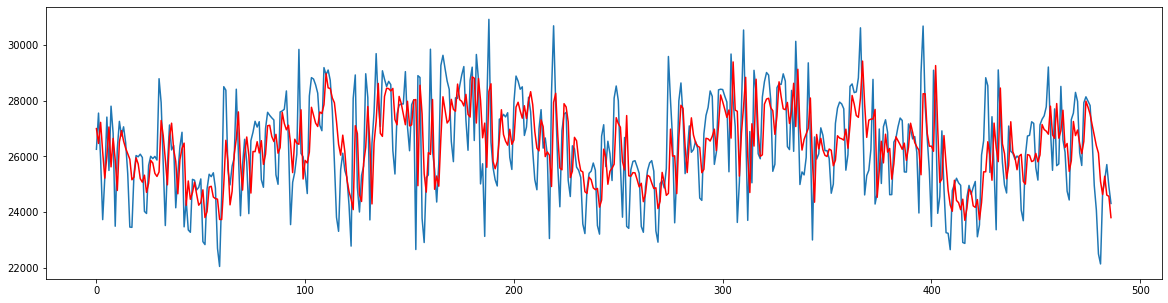

In [15]:
X = merge.values
size = int(len(X) * 2/3)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

for t in range(len(test)):
    model = ARIMA(history, order=(6,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    y = output[0]
    predictions.append(y)
    obs = test[t]
    history.append(obs)
    #print('predicted=%f, expected=%f' % (y, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
pyplot.figure(figsize=(20,5))
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

The moving average order to 10 (what I discovered from autocorrelation plot), but keep getting error.I am still discovering
Since the Autoregression order is 6, I am trying to have moving average order equals to 6 as well. However the MSE get worse.

F:\Jupiter\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
F:\Jupiter\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
F:\Jupiter\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
F:\Jupiter\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
F:\Jupiter\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
F:\Jupiter\lib\site-packages\statsmodels\base\model.py:54

F:\Jupiter\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
F:\Jupiter\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
F:\Jupiter\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
F:\Jupiter\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
F:\Jupiter\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
F:\Jupiter\lib\site-packages\statsm

F:\Jupiter\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
F:\Jupiter\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
F:\Jupiter\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
F:\Jupiter\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
F:\Jupiter\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
F:\Jupiter\lib\site-packages\statsmodels\base\

F:\Jupiter\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
F:\Jupiter\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
F:\Jupiter\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
F:\Jupiter\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
F:\Jupiter\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
F:\Jupiter\lib\site-packages\statsmodels\base\model.py:568: Converge

F:\Jupiter\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
F:\Jupiter\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
F:\Jupiter\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
F:\Jupiter\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
F:\Jupiter\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
F:\Jupiter\lib\site-packages\statsmodels\base\model.py:56

F:\Jupiter\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
F:\Jupiter\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
F:\Jupiter\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
F:\Jupiter\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
F:\Jupiter\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
F:\Jupiter\lib\site-packages\statsmodels\base\model.py:548: HessianI

F:\Jupiter\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
F:\Jupiter\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
F:\Jupiter\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
F:\Jupiter\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
F:\Jupiter\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
F:\Jupiter\lib\site-packages\statsmodels\base\

Test MSE: 2180910.080


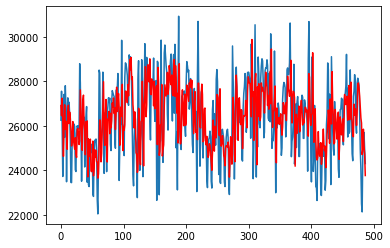

In [13]:
X = merge.values
size = int(len(X) * 2/3)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

for t in range(len(test)):
    model = ARIMA(history, order=(6,1,6))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    y = output[0]
    predictions.append(y)
    obs = test[t]
    history.append(obs)
    #print('predicted=%f, expected=%f' % (y, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

# Since the running time is very long and I am still discovering the best parameters. I will only show the result of hour 0 at this moment. May be I should only take 1 year data, the 4 years data could make the model overfitting. I will do more research and discuss with my supervisor in the meeting.It seems without the weather data. Time series analysis is the best approach for load predicting! 